can use functional network as well

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics, losses, optimizers, activations
from tensorflow.keras.datasets import imdb
import numpy as np

In [0]:
(train_data_r, train_labels_r), (test_data_r, test_labels_r) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data_r[0]])

In [0]:
def vectorize_sequences(sequences, dimension=10000)->np.ndarray:
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data_r).astype(np.float32)
x_test = vectorize_sequences(test_data_r).astype(np.float32)
y_train = np.asarray(train_labels_r).astype(np.float32)
y_test = np.asarray(test_labels_r).astype(np.float32)

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation=activations.relu, input_shape=(10000,)))
model.add(layers.Dense(16, activation=activations.relu))
model.add(layers.Dense(1, activation=activations.sigmoid))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.compile(optimizer=optimizers.RMSprop(),loss=losses.binary_crossentropy,metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
x_val = x_train[:10000]
partial_x_train= x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=1024, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6048 - acc: 0.7307 - val_loss: 0.5146 - val_acc: 0.8304
Epoch 2/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.4441 - acc: 0.8655 - val_loss: 0.4136 - val_acc: 0.8489
Epoch 3/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.3420 - acc: 0.9021 - val_loss: 0.3484 - val_acc: 0.8826
Epoch 4/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.2745 - acc: 0.9262 - val_loss: 0.3344 - val_acc: 0.8762
Epoch 5/20
15000/15000 [==============================] - 1s 47us/sample - loss: 0.2312 - acc: 0.9352 - val_loss: 0.3000 - val_acc: 0.8855
Epoch 6/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.2013 - acc: 0.9418 - val_loss: 0.2871 - val_acc: 0.8893
Epoch 7/20
15000/15000 [==============================] - 1s 46us/sample - loss: 0.1673 - acc: 0.9548 - val_loss: 0.

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
import matplotlib.pyplot as plt

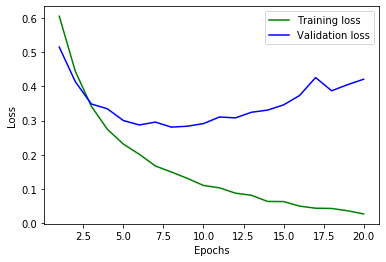

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g-', label='Training loss')
plt.plot(epochs, val_loss_values, 'b-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

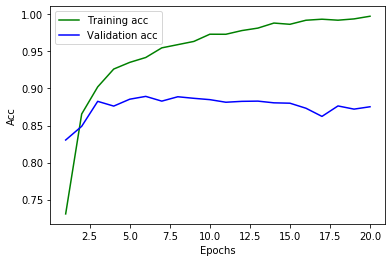

In [11]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g-', label='Training acc')
plt.plot(epochs, val_acc_values, 'b-', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [0]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [0]:
(train_data_rt, train_labels_rt), (test_data_rt, test_labels_rt) = reuters.load_data(
    num_words = 10000)
x_train_rt = vectorize_sequences(train_data_rt)
x_test_rt = vectorize_sequences(test_data_rt)
y_train_rt = to_categorical(train_labels_rt)
y_test_rt = to_categorical(test_labels_rt)

In [0]:
model_rt = models.Sequential()
model_rt.add(layers.Dense(64, activation=activations.relu, input_shape=(10000,)))
model_rt.add(layers.Dense(64,activation=activations.relu))
model_rt.add(layers.Dense(46,activation=activations.softmax))

In [0]:
model_rt.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy])

In [16]:
x_val_rt = x_train_rt[:1000]
y_val_rt = y_train_rt[:1000]
partial_x_train_rt = x_train_rt[1000:]
partial_y_train_rt = y_train_rt[1000:]
x_val_rt.shape

(1000, 10000)

In [17]:
history_rt = model_rt.fit(partial_x_train_rt, partial_y_train_rt, 
                          epochs=9, batch_size=512, 
                          validation_data=(x_val_rt,y_val_rt))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 88us/sample - loss: 2.5302 - categorical_accuracy: 0.5217 - val_loss: 1.6969 - val_categorical_accuracy: 0.6370
Epoch 2/9
7982/7982 [==============================] - 1s 80us/sample - loss: 1.3973 - categorical_accuracy: 0.7087 - val_loss: 1.2894 - val_categorical_accuracy: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 77us/sample - loss: 1.0409 - categorical_accuracy: 0.7741 - val_loss: 1.1275 - val_categorical_accuracy: 0.7450
Epoch 4/9
7982/7982 [==============================] - 1s 74us/sample - loss: 0.8176 - categorical_accuracy: 0.8221 - val_loss: 1.0253 - val_categorical_accuracy: 0.7710
Epoch 5/9
7982/7982 [==============================] - 1s 78us/sample - loss: 0.6497 - categorical_accuracy: 0.8582 - val_loss: 0.9363 - val_categorical_accuracy: 0.8010
Epoch 6/9
7982/7982 [==============================] - 1s 75us/sample - loss: 0.5163 - categorical_acc

In [20]:
results = model_rt.evaluate(x_test_rt, y_test_rt)
results

2246/2246 [==============================] - 0s 124us/sample - loss: 0.9926 - categorical_accuracy: 0.7827


[0.9925998879243302, 0.78272486]

In [23]:
import copy
test_labels_rt_copy = copy.copy(test_labels_rt)
np.random.shuffle(test_labels_rt_copy)
hits_array = np.array(test_labels_rt) == np.array(test_labels_rt_copy)
float(np.sum(hits_array))/len(test_labels_rt)

0.19545859305431879

In [28]:
predictions_rt = model_rt.predict(x_test)
prediction_labels_rt = np.argmax(predictions_rt, axis=1)
prediction_labels_rt

array([19,  3,  3, ..., 19,  3,  3])